#  Import Cleaned Data 

In [1]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import gmaps

# Import the data that was cleaned up previously 
main_df_atlantic = pd.read_csv(r'Database\new_data_atlantic.csv')

# Delete the undesired column 'Unnamed: 0'
del main_df_atlantic['Unnamed: 0']
main_df_atlantic

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
0,AL011851,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80
1,AL011851,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80
2,AL011851,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80
3,AL011851,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80
4,AL011851,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80
...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,2015-11-12,1200,EX,41.3N,50.4W,55
49101,AL122015,KATE,2015-11-12,1800,EX,41.9N,49.9W,55
49102,AL122015,KATE,2015-11-13,0,EX,41.5N,49.2W,50
49103,AL122015,KATE,2015-11-13,600,EX,40.8N,47.5W,45


# Further Data Process and Cleanup

In [2]:
# In order to group the data by year or month, the date needs to be split
# the codes below is to split month and year into two different columns
main_df_atlantic['Month'] = pd.DatetimeIndex(main_df_atlantic['Date']).month_name()
main_df_atlantic['Year'] = pd.DatetimeIndex(main_df_atlantic['Date']).year

# after beting split, column date can be deleted to clean up data further
del main_df_atlantic['Date']


# there are two type of storms: hurricanes and tropical storms
# original data frame is plit into two dataframes for these two types
HU_df = main_df_atlantic.loc[main_df_atlantic["Status"] == " HU",:] # extract hurricane data
TS_df= main_df_atlantic.loc[main_df_atlantic["Status"] == " TS",:]  # extract tropical storm data

In [3]:
# reorganize dataframe columns per personal preference
HU_df = HU_df[['ID', 'Name', 'Month', 'Year', 'Time', 'Status', 'Latitude', 'Longitude', 'Maximum Wind']]

# multiple rows of same IDs observed in dataframe, group them together by unique ID
HU_df_by_ID = HU_df.groupby(['ID'])
HU_df_by_ID.describe()

Year                                                       Time  \
         count    mean  std     min     25%     50%     75%     max count   
ID                                                                          
AL011851   6.0  1851.0  0.0  1851.0  1851.0  1851.0  1851.0  1851.0   6.0   
AL011852  28.0  1852.0  0.0  1852.0  1852.0  1852.0  1852.0  1852.0  28.0   
AL011854   5.0  1854.0  0.0  1854.0  1854.0  1854.0  1854.0  1854.0   5.0   
AL011855   1.0  1855.0  NaN  1855.0  1855.0  1855.0  1855.0  1855.0   1.0   
AL011856  10.0  1856.0  0.0  1856.0  1856.0  1856.0  1856.0  1856.0  10.0   
...        ...     ...  ...     ...     ...     ...     ...     ...   ...   
AL261969  11.0  1969.0  0.0  1969.0  1969.0  1969.0  1969.0  1969.0  11.0   
AL272005   6.0  2005.0  0.0  2005.0  2005.0  2005.0  2005.0  2005.0   6.0   
AL281969   4.0  1969.0  0.0  1969.0  1969.0  1969.0  1969.0  1969.0   4.0   
AL291969   6.0  1969.0  0.0  1969.0  1969.0  1969.0  1969.0  1969.0   6.0   
AL302005  20.0  2005.0  0.0  2005.0  2005.0  2005.0  2005.0  2005.0  20.0   

                       ...                 Maximum Wind              \
                 mean  ...     75%     max        count        mean   
ID                     ...                                            
AL011851   950.000000  ...  1650.0  2100.0          6.0   78.333333   
AL011852   900.000000  ...  1350.0  1800.0         28.0   88.571429   
AL011854   960.000000  ...  1200.0  1800.0          5.0   70.000000   
AL011855  1200.000000  ...  1200.0  1200.0          1.0   90.000000   
AL011856   780.000000  ...  1200.0  1800.0         10.0  102.000000   
...               ...  ...     ...     ...          ...         ...   
AL261969   927.272727  ...  1500.0  1800.0         11.0   75.909091   
AL272005   900.000000  ...  1200.0  1800.0          6.0   83.333333   
AL281969   900.000000  ...  1350.0  1800.0          4.0   65.000000   
AL291969   700.000000  ...  1050.0  1800.0          6.0   70.833333   
AL302005   900.000000  ...  1350.0  1800.0         20.0   67.000000   

                                                        
                std   min    25%    50%     75%    max  
ID                                                      
AL011851   4.082483  70.0  80.00   80.0   80.00   80.0  
AL011852  11.126973  70.0  80.00   90.0  100.00  100.0  
AL011854   0.000000  70.0  70.00   70.0   70.00   70.0  
AL011855        NaN  90.0  90.00   90.0   90.00   90.0  
AL011856  21.499354  70.0  82.50  105.0  117.50  130.0  
...             ...   ...    ...    ...     ...    ...  
AL261969   9.170110  65.0  70.00   75.0   82.50   90.0  
AL272005  11.690452  70.0  75.00   82.5   90.00  100.0  
AL281969   0.000000  65.0  65.00   65.0   65.00   65.0  
AL291969   5.845226  65.0  66.25   70.0   73.75   80.0  
AL302005   3.402785  65.0  65.00   65.0   70.00   75.0  

[890 rows x 24 columns]

# Hurricane Analysis Section

In [4]:
# to categorize hurricane, wind speed is chosen as per Saffir-Simpson Hurricane Wind Scale
# reference at :   https://www.nhc.noaa.gov/aboutsshws.php
HU_df_by_ID_maxWind = HU_df_by_ID.max()

# create bin for hurricane categories (7 values)
hurr_cat_bins = [0, 74, 95, 110, 129, 156, 300]

# Create the category names of the 6 bins
hurr_cat = ["TS", "1", "2", "3", "4", "5"]

# add binning into main dataframe and create a new column for Hurricane Category
HU_df_by_ID_maxWind['Category'] = pd.cut(HU_df_by_ID_maxWind['Maximum Wind'], hurr_cat_bins, labels=hurr_cat)
HU_df_by_ID_maxWind.head()

,Name,Month,Year,Time,Status,Latitude,Longitude,Maximum Wind,Category
ID,,,,,,,,,
AL011851,UNNAMED,June,1851,2100,HU,28.2N,97.0W,80,1
AL011852,UNNAMED,August,1852,1800,HU,31.2N,88.6W,100,2
AL011854,UNNAMED,June,1854,1800,HU,26.2N,97.0W,70,TS
AL011855,UNNAMED,August,1855,1200,HU,22.2N,98.0W,90,1
AL011856,UNNAMED,August,1856,1800,HU,30.0N,91.8W,130,4


In [5]:
# advance grouping with multiple columns and multi-indexes
HU_yearly = HU_df_by_ID_maxWind.groupby(['Year', 'Category']).count()
HU_yearly = HU_yearly.replace(np.NaN, 0)
HU_yearly.head(-10)

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind
Year Category                                                              
1851 TS         0.0    0.0   0.0     0.0       0.0        0.0           0.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0
     2          1.0    1.0   1.0     1.0       1.0        1.0           1.0
     3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0
...             ...    ...   ...     ...       ...        ...           ...
2013 3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     5          0.0    0.0   0.0     0.0       0.0        0.0           0.0
2014 TS         2.0    2.0   2.0     2.0       2.0        2.0           2.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0

[968 rows x 7 columns]

In [6]:
# quick check to see how many of each hurricane category
# due to multi-indexes, level=1 is used to indicate the Category, if need to use Year index column, use level=0
HU_yearly.max(level=1)

,Name,Month,Time,Status,Latitude,Longitude,Maximum Wind
Category,,,,,,,
TS,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
# review dataframe to see columns and data to write next code
HU_yearly.head()

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind
Year Category                                                              
1851 TS         0.0    0.0   0.0     0.0       0.0        0.0           0.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0
     2          1.0    1.0   1.0     1.0       1.0        1.0           1.0
     3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0

In [8]:
# the idea at this point is find out how many hurricanes happened for each category in every year

# access Year index columns and find the year number, build the list to hold the year value
list_x_axis = [label[0] for label in HU_yearly.index]

# data is investigate in 25/ 50 year cycle 
list_x_axis_allyear = []   # to store year numbers of entire dataframe
list_x_axis_25year = []    # to store year numbers in 25 year cycle
list_x_axis_50year = []    # to store year numbers in 50 year cycle

# loop to find and add year numbers for each cycle, 25 / 50 years
for each_label in list_x_axis:
    if each_label not in list_x_axis_allyear:
        if each_label > 1965:   # 2015 - 50 = 1965
            list_x_axis_50year.append(each_label)
        if each_label > 1990: # 2015 - 25 = 1990
            list_x_axis_25year.append(each_label)
        list_x_axis_allyear.append(each_label)        

<Figure size 720x576 with 0 Axes>

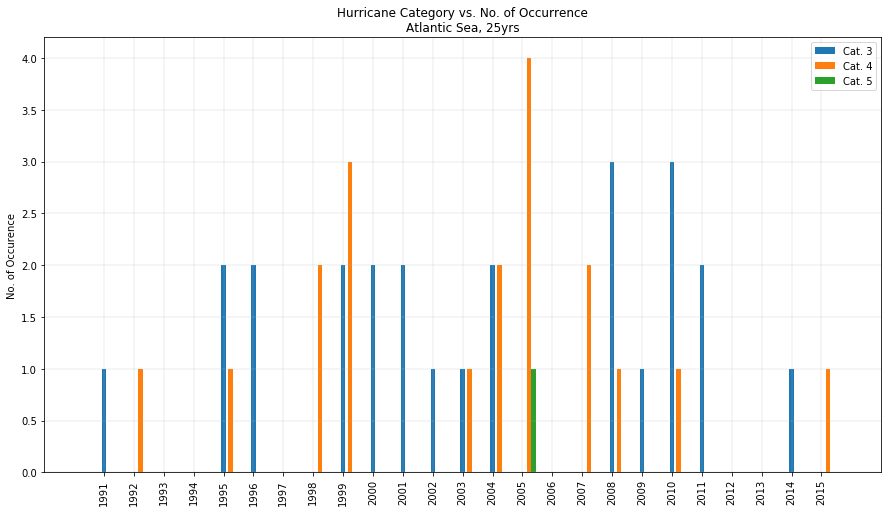

In [9]:
# create plot for 25 year cycle with all cat. hurricane

# define x-axis values
labels = list_x_axis_25year

# define y-axis values
cat1 = HU_yearly.loc[(labels,'1'), 'Name'].reset_index(level=0, drop=True)
cat2 = HU_yearly.loc[(labels,'2'), 'Name'].reset_index(level=0, drop=True)
cat3 = HU_yearly.loc[(labels,'3'), 'Name'].reset_index(level=0, drop=True)
cat4 = HU_yearly.loc[(labels,'4'), 'Name'].reset_index(level=0, drop=True)
cat5 = HU_yearly.loc[(labels,'5'), 'Name'].reset_index(level=0, drop=True)

# label locations
x = np.arange(0, len(labels), 1)  

# figure size
plt.figure(figsize=(10, 8)) # width = 10, height = 8

# the width of the bars
width = 0.15 



fig, ax = plt.subplots()

# cat 3+ hurricanes are known to have devastating effects, 1 and 2 are not plotted to simplify the chart
# cat1bar = ax.bar(x - 2*width - width/2, cat1, width, label='Cat. 1')
# cat2bar = ax.bar(x - width - width/2, cat2, width, label='Cat. 2')
cat3bar = ax.bar(x, cat3, width, label='Cat. 3') #, linestyle="--", color='g', marker='o')
cat4bar = ax.bar(x + width + width/2, cat4, width, label='Cat. 4') #, linestyle=":", color='orange', marker='o')
cat5bar = ax.bar(x + 2*width + width/2, cat5, width, label='Cat. 5') #, linestyle="-.", color='r', marker='o')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Occurence')
ax.set_title('Hurricane Category vs. No. of Occurrence\nAtlantic Sea, 25yrs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlim(min(x)-2,max(x)+2 )
fig.set_size_inches(15, 8)
plt.xticks(rotation=90)
ax.legend()
plt.grid(linestyle = "-", linewidth = 0.25)
plt.show()
fig.savefig("HL_Plots\Hurc_Occ_AtlSea_25yrs")

<Figure size 720x576 with 0 Axes>

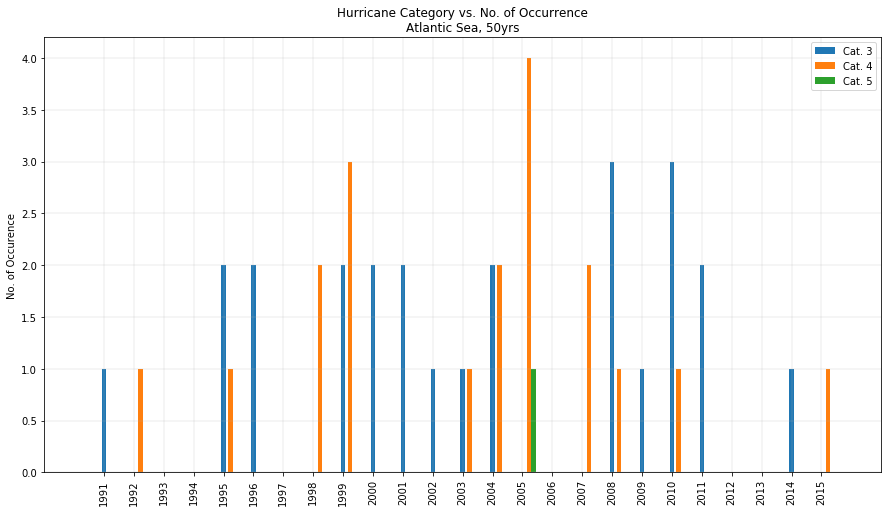

In [10]:
# create plot for 50 year cycle with all hurricane cat.

cat1 = HU_yearly.loc[(labels,'1'), 'Name'].reset_index(level=0, drop=True)
cat2 = HU_yearly.loc[(labels,'2'), 'Name'].reset_index(level=0, drop=True)
cat3 = HU_yearly.loc[(labels,'3'), 'Name'].reset_index(level=0, drop=True)
cat4 = HU_yearly.loc[(labels,'4'), 'Name'].reset_index(level=0, drop=True)
cat5 = HU_yearly.loc[(labels,'5'), 'Name'].reset_index(level=0, drop=True)

# the label locations
x = np.arange(0, len(labels), 1)  

# define size of the figure
plt.figure(figsize=(10, 8))  # width:10, height:8

# the width of the bars
width = 0.15 

fig, ax = plt.subplots()

# cat 3+ hurricanes are known to have devastating effects, 1 and 2 are not plotted to simplify the chart
# cat1bar = ax.bar(x - 2*width - width/2, cat1, width, label='Cat. 1')
# cat2bar = ax.bar(x - width - width/2, cat2, width, label='Cat. 2')
cat3bar = ax.bar(x, cat3, width, label='Cat. 3') #, linestyle="--", color='g', marker='o')
cat4bar = ax.bar(x + width + width/2, cat4, width, label='Cat. 4') #, linestyle=":", color='orange', marker='o')
cat5bar = ax.bar(x + 2*width + width/2, cat5, width, label='Cat. 5') #, linestyle="-.", color='r', marker='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Occurence')
ax.set_title('Hurricane Category vs. No. of Occurrence\nAtlantic Sea, 50yrs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlim(min(x)-2,max(x)+2 )
fig.set_size_inches(15, 8)
plt.xticks(rotation=90)
ax.legend()
plt.grid(linestyle = "-", linewidth = 0.25)
plt.show()
fig.savefig("HL_Plots\Hurc_Occ_AtlSea_50yrs")

In [11]:
HU_df_by_ID = HU_df.groupby(['ID']).first


In [12]:
# 10 Years hurricane location on gmaps
# the format of coordinates from original data is not compatible with gmaps
# convert to "gmaps-friendly" coordinates
main_hurricane_location_df = HU_df.loc[HU_df['Year'] > 2004, :]
main_hurricane_location_df.groupby('Year')['ID'].unique()
hurricane_location_df = main_hurricane_location_df[['Latitude', 'Longitude']]
hurricane_location_df['Latitude'] = hurricane_location_df['Latitude'].str[:-1].astype('float')
hurricane_location_df['Longitude'] = hurricane_location_df['Longitude'].str[:-1].astype('float')
hurricane_location_df['Longitude'] = hurricane_location_df['Longitude']*(-1)
hurricane_location_df

,Latitude,Longitude
43759,28.5,-90.3
43760,29.2,-90.1
43793,16.2,-73.0
43794,16.7,-74.1
43795,17.6,-74.9
...,...,...
49053,40.3,-51.5
49094,33.1,-71.3
49095,35.2,-67.6
49096,36.2,-62.5


In [13]:
# create base figure and add layer to show hurricane locations based on coordinates
fig = gmaps.figure()
hurricane_layer = gmaps.symbol_layer(
    hurricane_location_df, fill_color='red', scale=2)
fig.add_layer(hurricane_layer)
fig

Figure(layout=FigureLayout(height='420px'))

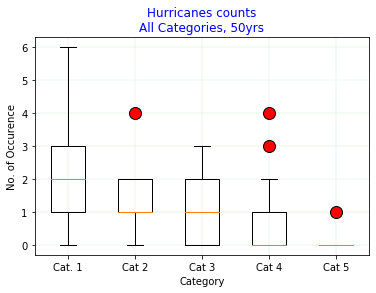

In [14]:
# Generate a box plot for all 5 storm categories
fig1, ax1 = plt.subplots()
ax1.set_title('Hurricanes counts\nAll Categories, 50yrs', color='blue') # chart main title
ax1.set_xlabel('Category') # setting x-axis label
ax1.set_ylabel('No. of Occurence') # setting y-axis label
x_axis = ['Cat. 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5']
ax1.set_xticklabels(x_axis) # setting x-axis tickmark labels

# format outliers to show them clearer in the boxplot, assigned red color as fill
outlier_format = dict(marker='o', markerfacecolor='r', markersize = 12, markeredgecolor = 'k', linestyle='none')

# plot data on the box plot with formatted outliers
ax1.boxplot([cat1, cat2, cat3, cat4, cat5], flierprops = outlier_format)
ax1.grid(color='g', linestyle='--', linewidth=0.1)
plt.show()
fig1.savefig("HL_Plots\Boxplot_HrCnt")
# 

# Tropical Storm Analysis Section

In [15]:
TS_df

,ID,Name,Time,Status,Latitude,Longitude,Maximum Wind,Month,Year
6,AL011851,UNNAMED,600,TS,28.3N,97.6W,60,June,1851
7,AL011851,UNNAMED,1200,TS,28.4N,98.3W,60,June,1851
8,AL011851,UNNAMED,1800,TS,28.6N,98.9W,50,June,1851
9,AL011851,UNNAMED,0,TS,29.0N,99.4W,50,June,1851
10,AL011851,UNNAMED,600,TS,29.5N,99.8W,40,June,1851
...,...,...,...,...,...,...,...,...,...
49089,AL122015,KATE,1800,TS,25.0N,75.7W,45,November,2015
49090,AL122015,KATE,0,TS,26.4N,76.2W,50,November,2015
49091,AL122015,KATE,600,TS,28.0N,76.2W,55,November,2015
49092,AL122015,KATE,1200,TS,29.5N,75.4W,60,November,2015


In [16]:
# Group tropical storm by year
# objective is finding tropical storm trending over time 
# 1964 (50 years) cycle is picked for this analysis
TS_Atl_Grpby_Yr = TS_df.groupby('Year').count()
TS_Atl_Grpby_Yr.reset_index(inplace=True)
data_50yr = TS_Atl_Grpby_Yr.loc[TS_Atl_Grpby_Yr['Year'] > 1964, :]
data_50yr.head(10)

,Year,ID,Name,Time,Status,Latitude,Longitude,Maximum Wind,Month
114,1965,49,49,49,49,49,49,49,49
115,1966,89,89,89,89,89,89,89,89
116,1967,87,87,87,87,87,87,87,87
117,1968,66,66,66,66,66,66,66,66
118,1969,175,175,175,175,175,175,175,175
119,1970,66,66,66,66,66,66,66,66
120,1971,137,137,137,137,137,137,137,137
121,1972,59,59,59,59,59,59,59,59
122,1973,90,90,90,90,90,90,90,90
123,1974,69,69,69,69,69,69,69,69


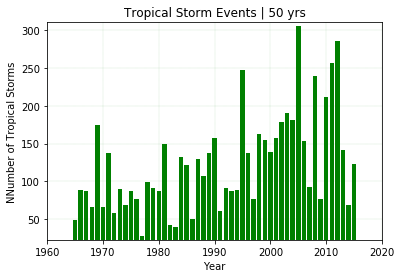

In [17]:
# plot tropical storms vs year

# create tick location for bar chart
xtick_loc = [tick for tick in np.arange(len(x_axis))]

# create axis labels
x_axis = list(data_50yr['Year'])
y_axis = list(data_50yr['ID'])

# create bar chart plot
plt.bar(x_axis, y_axis, alpha=1, align = 'center', color= 'g')
plt.xticks(rotation='horizontal')
plt.title("Tropical Storm Events | 50 yrs")
plt.xlabel("Year")
plt.ylabel("NNumber of Tropical Storms")
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)
plt.ylim(min(y_axis) - 5, max(y_axis) + 5)
plt.grid(color='g', linestyle='--', linewidth=0.1)
plt.show
plt.savefig("HL_Plots\Bar_TrpStm_50yrs")

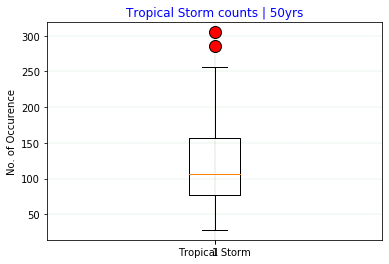

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a box plot for statistical analysis of tropical storms

plt.title('Tropical Storm counts | 50yrs', color='blue') # chart main title
plt.xticks([1], ['Tropical Storm']) # setting x-axis label
plt.ylabel('No. of Occurence') # setting y-axis label
TS_y_axis = y_axis

# format outliers to show them clearer in the boxplot, assigned red color as fill
outlier_format = dict(marker='o', markerfacecolor='r', markersize = 12, markeredgecolor = 'k', linestyle='none')

# plot data on the box plot with formatted outliers
plt.boxplot(TS_y_axis, flierprops = outlier_format)
plt.grid(color='g', linestyle='--', linewidth=0.1)
plt.show()
plt.savefig("HL_Plots\Boxplot_TrpStm_50yrs")